# NLP Clissification
---
**Dataset:** bbc news (250 samples) News contents with 5 categories (Sport, Business, Politics, Tech and Others)

**Model:**   multiclass classification model : Logistic Regression

**Training:**  Colab (GPU)  

**Process:**  1. Dataset Load  ➔ 2. Data processing ➔ 3. Model Training  ➔ 4. Model Evaluation

**Result:**  Accuracy  = 0.84, run time = 1 minutes

## 0. Environment

In [0]:
# Based Library
import tensorflow as tf; print("tensorflow version : " + tf.__version__)
import keras; print("keras version : " + keras.__version__)

tensorflow version : 1.14.0
keras version : 2.2.4


Using TensorFlow backend.


In [0]:
# Processor

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15573021760763827416
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4267384652972403812
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2014644894897463019
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6510755840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14844575923190613595
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


## 1. Dataset Load

In [0]:
import pandas as pd

input_file = "/content/drive/My Drive/dataset/bbc/bbc-text250.csv"

df = pd.read_csv(input_file)

In [0]:
df.head()

,category,text
0,business,worldcom boss left books alone former worldc...
1,business,virgin blue shares plummet 20% shares in austr...
2,business,crude oil prices back above $50 cold weather a...
3,business,s korean credit card firm rescued south korea ...
4,business,japanese banking battle at an end japan s sumi...


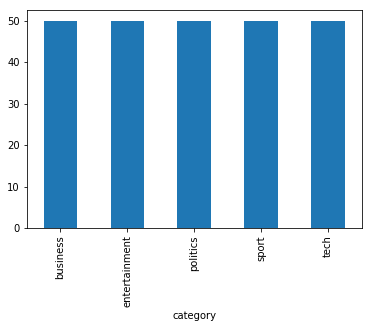

In [0]:
import matplotlib.pyplot as plt

df.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

## 2. Data Processing

In [0]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
df.head()

,category,text,cleaned
0,business,worldcom boss left books alone former worldc...,worldcom boss left book alon former worldcom b...
1,business,virgin blue shares plummet 20% shares in austr...,virgin blue share plummet share australian bud...
2,business,crude oil prices back above $50 cold weather a...,crude oil price back cold weather across part ...
3,business,s korean credit card firm rescued south korea ...,korean credit card firm rescu south korea larg...
4,business,japanese banking battle at an end japan s sumi...,japanes bank battl end japan sumitomo mitsui f...


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df['cleaned']).toarray()
final_features.shape

(250, 2990)

In [0]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df['cleaned']
Y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

print("X_train count : ", len(X_train))
print("X_test count : ", len(X_test))

X_train count :  200
X_test count :  50


## 3. Model Training

In [0]:
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=200)),
                     ('clf', LogisticRegression(random_state=0))])

model = pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## 4. Model Evaluation

In [0]:
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

               precision    recall  f1-score   support

     business       0.85      1.00      0.92        11
entertainment       1.00      0.58      0.74        12
     politics       0.86      0.67      0.75         9
        sport       0.85      1.00      0.92        11
         tech       0.70      1.00      0.82         7

     accuracy                           0.84        50
    macro avg       0.85      0.85      0.83        50
 weighted avg       0.86      0.84      0.83        50

[[11  0  0  0  0]
 [ 1  7  1  0  3]
 [ 1  0  6  2  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0  7]]
